In [1]:
#!pip

## r1_correctLC

In [2]:
from astropy import stats #for MAD

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from lightkurve import LightCurve
import astropy.units as u
import logging
#import batman-package as batman
#batman = __import__("batman-package")
import matplotlib
#from basic_functions import stop

logging.basicConfig(format='%(asctime)s %(levelname)s: %(name)s(%(funcName)s): %(message)s', level=logging.DEBUG)

import tessutils #NOT the normal utils!

#dataDir = "data"
#downloadDir = "mastDownload/TESS"
#outdir = "results_notCorrectedForSineLong"
#correctSine = False

###################################################################################################


2019-11-10 20:18:07,523 DEBUG: matplotlib.pyplot(switch_backend): Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [4]:
import matplotlib.pyplot as plt
from astropy.table import Table
import astropy.units as u
from astropy.io import fits 
import os
from lightkurve import LightCurve
import numpy as np
import requests
import gzip 
import pickle

import logging
logger = logging.getLogger(__name__)

import subprocess
from matplotlib import rc

import os
import shutil

In [5]:
lc = None
folderName = 'tess2018206045859-s0001-0000000092352620-0120-s'
downloadDir = 'CleanPath/LowMags/TIC_92352620/' #Path must flow like this

lc, sectors = tessutils.loadLC(folderName, downloadDir, fluxType="PDCSAP", normalised=True)
lcOri = lc.copy()

# Show what it looks like
#plt.figure()
#plt.scatter(lc.time, lc.flux, label="LC", marker='.', s=5)
#lcB = lc.bin(100, method="median")
#plt.scatter(lcB.time, lcB.flux, label="LC", marker='.', s=5)
#plt.savefig(os.path.join(downloadDir, "TIC_92352620_raw.pdf"))
#plt.show()

2019-11-10 20:18:07,608 INFO: tessutils(loadLC): Cadence is 2 min for CleanPath/LowMags/TIC_92352620/tess2018206045859-s0001-0000000092352620-0120-s\tess2018206045859-s0001-0000000092352620-0120-s_lc.fits
D:\Python\Anaconda\lib\site-packages\lightkurve\lightcurve.py:108: LightkurveWarning: LightCurve object contains NaN times
  warnings.warn('LightCurve object contains NaN times', LightkurveWarning)


## Parameters

In [6]:
q1 = 0.2098861500
q2 = 0.2455166013
u1 = 2 * np.sqrt(q1) * q2
u2 = np.sqrt(q1) * (1. - 2 * q2)

###Changing params. to params_
#params = batman.TransitParams()
params_t0 =  2458119.72117-2457000                      #time of inferior conjunction
params_per = 1.27492510                      #orbital period
params_rp = 0.12627                      #planet radius (in units of stellar radii)
params_a = 3.835                       #semi-major axis (in units of stellar radii)
params_inc = 87.08                     #orbital inclination (in degrees)
params_ecc = 0.0605                      #eccentricity
params_w = 9.7                       #longitude of periastron (in degrees)
params_u = [u1, u2]                #limb darkening coefficients
params_limb_dark = "quadratic"       #limb darkening model

# According to TESS alert
params_t0 = 1491.9986898
params_a = 3.8083
params_rp = 0.1234

q1 = 0.2098861500
q2 = 0.2455166013
u1 = 2 * np.sqrt(q1) * q2
u2 = np.sqrt(q1) * (1. - 2 * q2)
params_u = [u1, u2]

antiphaseCentred = 0.1 #Change from 0 to something else???

period = params_per * u.day#1.27492510 * u.day
t0 = params_t0 * u.day #(2458119.72117-2457000) * u.day

## Median Detrend

In [7]:
def medianDetrend(lc, windowFactorDurationTransit, returnMedians=False): #remove durationTransitHour
    
    #durationTransit = durationTransitHour / 24.
    window = windowFactorDurationTransit # * durationTransit
    
    t = lc.time / window
    t -= np.amin(t)
    tMax = int(np.ceil(np.amax(t)))
    
    medians = []
    ts = []
    te = []
    for windowStart in range(0, tMax):
        ts.append(windowStart)
        te.append(windowStart+1.)
        currentIds = np.where(np.logical_and(t >= windowStart, t < windowStart+1.))
        median = np.nanmedian(lc.flux[currentIds])
        medians.append(median)
        lc.flux_err[currentIds] /= median        
        lc.flux[currentIds] /= median

    if returnMedians:
        return lc, medians, ts, te, t
    return lc 

## (Removed) Light Curve

In [12]:
plt.rc('font', family="Times New Roman")
plt.rc('font', size=14)

## (Removed) Light Curve (Folding "In Phase")

## (Removed) DeltaT Bin

## (Removed) Best-Fit Model

In [8]:
time = max(lc.time)-min(lc.time)
time
lc == lcOri

False

2019-11-10 21:22:42,230 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:22:42,275 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:22:42,277 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 21:22:42,826 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:22:42,856 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:22:42,859 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


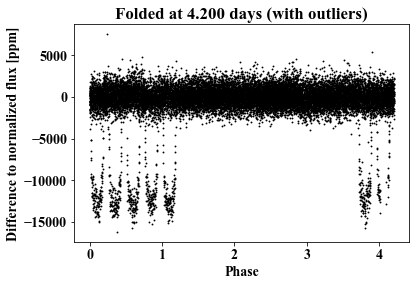

2019-11-10 21:22:43,623 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:22:43,659 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:22:43,660 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 21:22:44,192 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:22:44,213 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:22:44,214 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


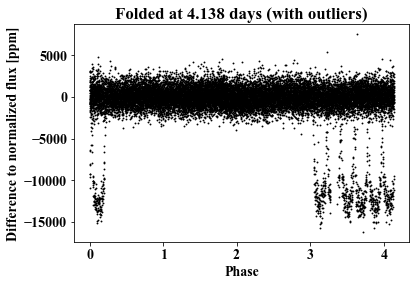

2019-11-10 21:22:44,841 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:22:44,869 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:22:44,870 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 21:22:45,361 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:22:45,382 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:22:45,383 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


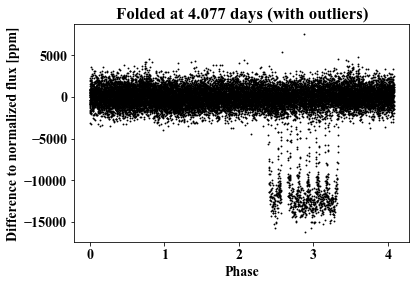

2019-11-10 21:22:46,132 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:22:46,158 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:22:46,159 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 21:22:46,735 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:22:46,758 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:22:46,758 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


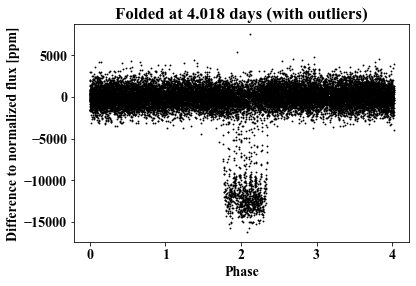

2019-11-10 21:22:47,477 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:22:47,497 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:22:47,498 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 21:22:48,078 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:22:48,096 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:22:48,097 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


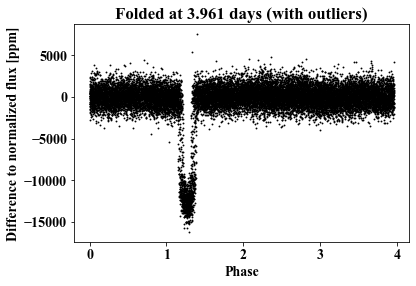

2019-11-10 21:22:48,700 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:22:48,720 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:22:48,721 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 21:22:49,276 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:22:49,301 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:22:49,303 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


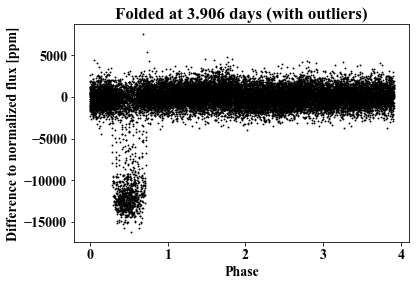

2019-11-10 21:22:49,981 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:22:50,001 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:22:50,003 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 21:22:50,493 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:22:50,512 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:22:50,513 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


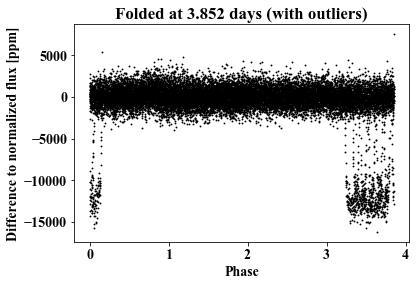

[4.2,
 4.1376374607581035,
 4.077099771591672,
 4.018307989481871,
 3.9611876601163045,
 3.9056685033252827,
 3.851684124605596]

In [86]:
time = max(lc.time)-min(lc.time)
lcTransit = lc.copy()
def gridfreq(lc, N=10):
    periods=[]
    phases=[]
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period)
        plt.scatter(phase, (lcTransit.flux-1.)*1e6, marker=".", color="k", s=3)
        plt.title("Folded at {} days".format('%.3f'%(period))+' (with outliers)')
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux [ppm]")
        plt.savefig(os.path.join(downloadDir,"PhaseFold_beforeout{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
        phases.append(phase)
    return periods

gridfreq(lcTransit)

## Removal of Outliers (with astropy)

2019-11-10 20:19:42,073 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: Matching :family=Times New Roman:style=normal:variant=normal:weight=normal:stretch=normal:size=16.8.
2019-11-10 20:19:42,075 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,077 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-10 20:19:42,077 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,079 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-10 20:19:42,080 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 

2019-11-10 20:19:42,135 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal demi normal>) = 10.24
2019-11-10 20:19:42,136 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal bold normal>) = 11.335
2019-11-10 20:19:42,136 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
2019-11-10 20:19:42,138 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,138 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal book normal>) = 10.05
2019-11-10 20:19:42,139 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.05
2019-11-10 20:1

2019-11-10 20:19:42,207 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 10.05
2019-11-10 20:19:42,208 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,209 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,213 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,214 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,215 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,216 DEBUG: matplotlib

2019-11-10 20:19:42,273 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Candara' (Candaral.ttf) normal normal light normal>) = 10.24
2019-11-10 20:19:42,274 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Constantia' (constanz.ttf) italic normal bold normal>) = 11.335
2019-11-10 20:19:42,276 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Elephant' (ELEPHNT.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,277 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal bold condensed>) = 11.535
2019-11-10 20:19:42,278 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal bold normal>) = 10.335
2019-11-10 20:19:42,282 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,284 DEBUG: matplotlib.f

2019-11-10 20:19:42,330 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal regular normal>) = 10.05
2019-11-10 20:19:42,331 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal bold normal>) = 11.335
2019-11-10 20:19:42,332 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,333 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,333 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,334 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal bold normal>) = 10.335
2019-11-10 20:19:42,336 DEBUG: matplotlib.font_m

2019-11-10 20:19:42,379 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal book normal>) = 11.05
2019-11-10 20:19:42,380 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
2019-11-10 20:19:42,381 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
2019-11-10 20:19:42,382 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
2019-11-10 20:19:42,383 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,384 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,385 DEBUG: mat

2019-11-10 20:19:42,428 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,429 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal book normal>) = 10.05
2019-11-10 20:19:42,430 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
2019-11-10 20:19:42,431 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'High Tower Text' (HTOWERT.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,432 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
2019-11-10 20:19:42,433 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 11.05
2019-11-10 20:19:42,433 DEBUG: matplotlib.font_

2019-11-10 20:19:42,479 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal bold normal>) = 10.335
2019-11-10 20:19:42,480 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal book normal>) = 10.05
2019-11-10 20:19:42,481 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Goudy Old Style' (GOUDOSB.TTF) normal normal bold normal>) = 10.335
2019-11-10 20:19:42,482 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,482 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,483 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal bold normal>) = 10.335
2019-11-10 20:19:42,48

2019-11-10 20:19:42,886 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2019-11-10 20:19:42,887 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
2019-11-10 20:19:42,888 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,889 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 10.335
2019-11-10 20:19:42,889 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,890 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 norma

2019-11-10 20:19:42,930 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,931 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal light normal>) = 10.24
2019-11-10 20:19:42,932 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal bold normal>) = 10.335
2019-11-10 20:19:42,933 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal bold normal>) = 10.335
2019-11-10 20:19:42,933 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:42,934 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal roman normal>) = 0.14500000000000002
2019-11-10 20:19:42,9

2019-11-10 20:19:43,017 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:43,018 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
2019-11-10 20:19:43,020 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:43,021 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Calisto MT' (CALIST.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:43,024 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal semibold normal>) = 11.24
2019-11-10 20:19:43,025 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.05
2019-11-10 20:19:43,026 DEBUG: matplotlib.font_m

2019-11-10 20:19:43,124 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal regular normal>) = 10.05
2019-11-10 20:19:43,126 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal bold normal>) = 11.335
2019-11-10 20:19:43,129 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:43,132 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
2019-11-10 20:19:43,133 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal bold normal>) = 10.335
2019-11-10 20:19:43,134 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal book normal>) = 10.05
2019-11-10 20:1

2019-11-10 20:19:43,227 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal black normal>) = 11.525
2019-11-10 20:19:43,229 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal bold normal>) = 10.335
2019-11-10 20:19:43,232 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bodoni MT' (BOD_BI.TTF) italic normal bold normal>) = 11.335
2019-11-10 20:19:43,233 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
2019-11-10 20:19:43,234 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal roman normal>) = 1.145
2019-11-10 20:19:43,237 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEBO.TTF) oblique normal bold normal>) = 11.335
2019-11-10 20:19:43,2

2019-11-10 20:19:43,325 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
2019-11-10 20:19:43,326 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:43,328 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal bold normal>) = 11.335
2019-11-10 20:19:43,329 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
2019-11-10 20:19:43,332 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal roman normal>) = 10.145
2019-11-10 20:19:43,334 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal medium normal>) = 10.145
2019-11

2019-11-10 20:19:43,386 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.05
2019-11-10 20:19:43,388 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:43,388 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:43,390 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal bold normal>) = 10.335
2019-11-10 20:19:43,391 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.05
2019-11-10 20:19:43,391 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bodoni MT' (BOD_PSTC.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:43,392 DEBUG: matplotlib.font_manager

2019-11-10 20:19:43,435 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal book normal>) = 11.05
2019-11-10 20:19:43,436 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
2019-11-10 20:19:43,437 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
2019-11-10 20:19:43,437 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal bold normal>) = 10.335
2019-11-10 20:19:43,438 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Adobe Devanagari' (AdobeDevanagari-Regular.otf) normal normal 400 normal>) = 10.05
2019-11-10 20:19:43,439 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Britannic Bold' (BRITANIC.TTF) normal normal bold normal>) = 10.335
2019-11-10 20

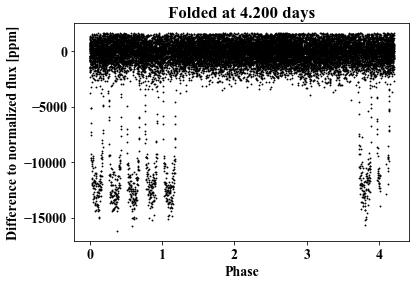

2019-11-10 20:19:44,699 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 20:19:44,716 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 20:19:44,717 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 20:19:45,468 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 20:19:45,519 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 20:19:45,523 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


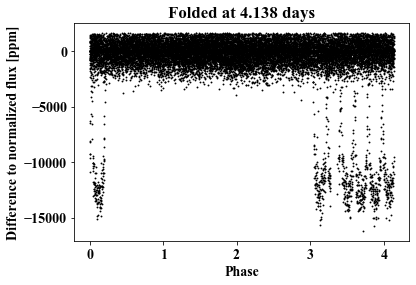

2019-11-10 20:19:46,713 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 20:19:46,748 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 20:19:46,750 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 20:19:47,322 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 20:19:47,343 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 20:19:47,345 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


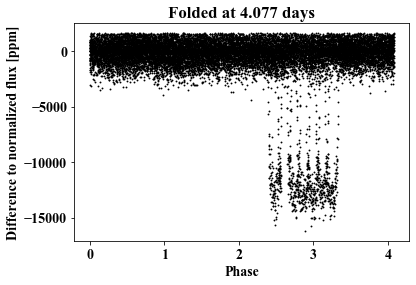

2019-11-10 20:19:47,961 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 20:19:47,982 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 20:19:47,983 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 20:19:48,576 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 20:19:48,598 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 20:19:48,599 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


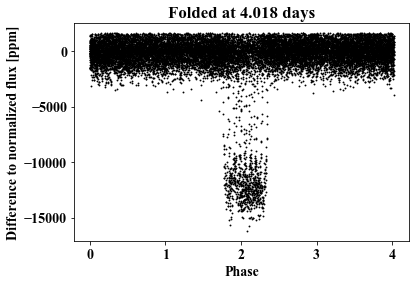

2019-11-10 20:19:49,323 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 20:19:49,343 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 20:19:49,344 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 20:19:49,921 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 20:19:49,948 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 20:19:49,950 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


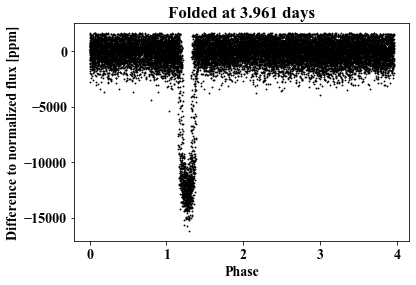

2019-11-10 20:19:50,731 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 20:19:50,766 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 20:19:50,767 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 20:19:51,290 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 20:19:51,307 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 20:19:51,308 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


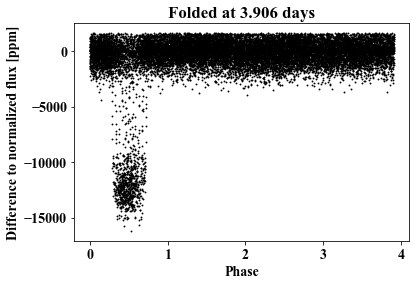

2019-11-10 20:19:52,156 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 20:19:52,180 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 20:19:52,181 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 20:19:52,667 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 20:19:52,685 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 20:19:52,686 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


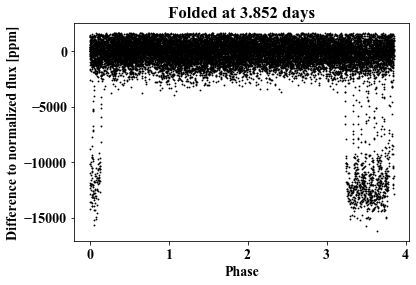

[4.2,
 4.1376374607581035,
 4.077099771591672,
 4.018307989481871,
 3.9611876601163045,
 3.9056685033252827,
 3.851684124605596]

In [13]:
lcTransit = lc.copy()
def gridfreq(lc,N=10):
    periods=[]
    phases=[]
    time = max(lc.time)-min(lc.time)
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period)
        ##Outlier removal below
        flux_nomad = lc.flux-1
        mad = stats.median_absolute_deviation(flux_nomad)
        flux_mad = np.where(flux_nomad > 2*mad, 0, flux_nomad)
        ##Outlier removal above
        plt.scatter(phase, (flux_mad)*1e6, marker=".", color="k", s=3)
        plt.title("Folded at {} days".format('%.3f'%(period)))
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux [ppm]")
        plt.savefig(os.path.join(downloadDir,"PhaseFold_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
        phases.append(phase)
    return periods

gridfreq(lcTransit)

## Binning

2019-11-10 21:21:27,680 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:21:27,704 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:21:27,705 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 21:21:27,795 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:21:27,816 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:21:27,817 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


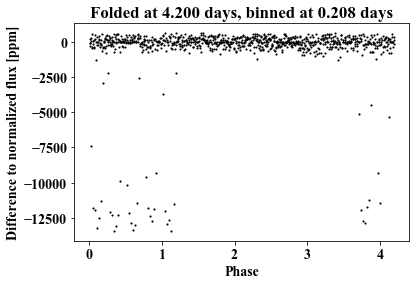

2019-11-10 21:21:28,071 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:21:28,093 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:21:28,094 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 21:21:28,186 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:21:28,208 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:21:28,209 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


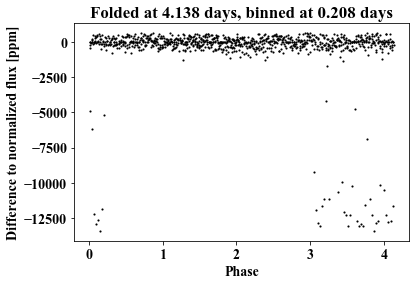

2019-11-10 21:21:28,471 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:21:28,494 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:21:28,495 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 21:21:28,580 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:21:28,601 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:21:28,602 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


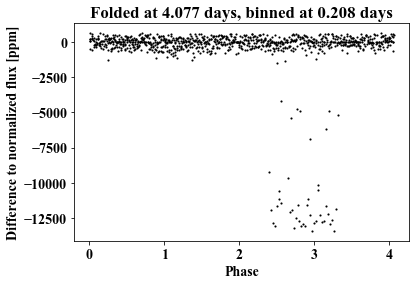

2019-11-10 21:21:28,855 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:21:28,877 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:21:28,879 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 21:21:28,991 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:21:29,024 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:21:29,025 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


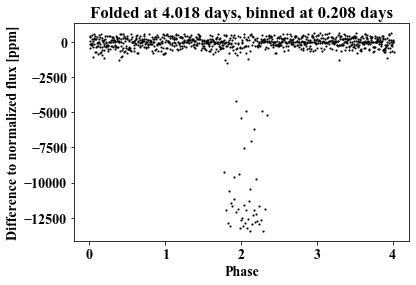

2019-11-10 21:21:29,392 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:21:29,413 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:21:29,414 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 21:21:29,494 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:21:29,513 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:21:29,514 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


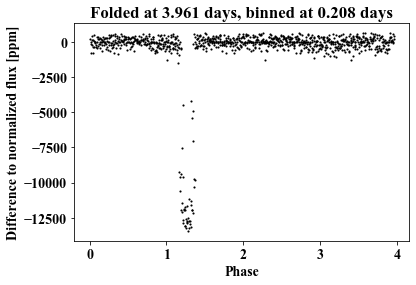

2019-11-10 21:21:29,762 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:21:29,785 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:21:29,787 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 21:21:29,871 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:21:29,891 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:21:29,892 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


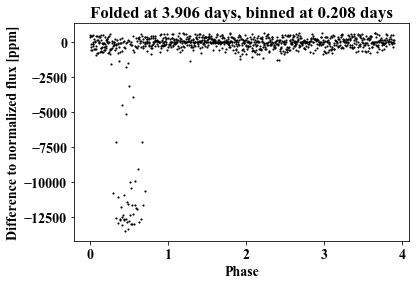

2019-11-10 21:21:30,167 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:21:30,192 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:21:30,193 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-10 21:21:30,294 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-10 21:21:30,314 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-10 21:21:30,315 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


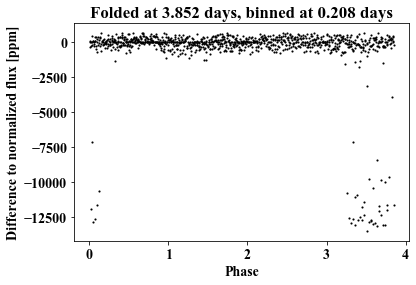

[4.2,
 4.1376374607581035,
 4.077099771591672,
 4.018307989481871,
 3.9611876601163045,
 3.9056685033252827,
 3.851684124605596]

In [83]:
def meandt(lc, N=10, dt=5):
    periods = []
    time = max(lc.time)-min(lc.time)
    dt = dt/24 #converting to day
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        
        ##Binning below
        s = period / dt
        lcB = lc.bin(binsize=s, method='median')
        phasebin = (lcB.time % period)
        ##Binninng above
                    
        ##Outlier removal below
        flux_nomad = lcB.flux-1
        mad = stats.median_absolute_deviation(flux_nomad)
        flux_mad = np.where(flux_nomad > 2*mad, 0, flux_nomad)
        ##Outlier removal above
    
        plt.scatter(phasebin, (flux_mad)*1e6, marker=".", color="k", s=5)
        plt.title("Folded at {} days".format('%.3f'%(period))+', binned at {} days'.format('%.3f'%(dt)))
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux [ppm]")
        plt.savefig(os.path.join(downloadDir,"PhaseFoldBin_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
    return periods

meandt(lc)


## Window Sliding

In [250]:
def window(a, w=12, o=4, copy=False):
    sh = (a.size - w + 1, w)
    st = a.strides * 2
    view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::o]
    if copy:
        return view.copy()
    else:
        return view

In [270]:
def meandt1(lc, N=10, dt=5):
    time = max(lc.time)-min(lc.time)
    dt = dt/24 #converting to day
    period = 3.9611876601163045
        
    ##Binning below
    s = period / dt
    lcB = lc.bin(binsize=s, method='median')
    phasebin = (lcB.time % period)
    ##Binninng above
                    
    ## +Outlier removal below
    flux_nomad = lcB.flux-1
    mad = stats.median_absolute_deviation(flux_nomad)
    print(mad)
    flux_mad = np.where(flux_nomad > 2*mad, 0, flux_nomad)
    ## +Outlier removal above
    
    ## -Outlier removal below
    
    std = np.std(flux_nomad)
    #windows = np.array_split(flux_mad, 24)
    windows = window(flux_mad)
    #print(windows)
    firstapp = (mad-windows)/std
    print(firstapp[50])
    #firstapps=[]
    #for i in range(0, 11):
    #for j in range(0, len(windows[3])):
        #firstapp = (mad - windows[3][j])/std
        #firstapps.append(firstapp)
    #return firstapps
    
    #print(firstapps)
    ## -Outlier removal above
    
    #plt.scatter(phasebin, flux_mad*1e6, marker=".", color="k", s=5)
    #plt.title("Folded at {} days".format('%.3f'%(period))+', binned at {} days'.format('%.3f'%(dt)))
    #plt.xlabel("Phase")
    #plt.ylabel("Difference to normalized flux [ppm]")
    #plt.savefig(os.path.join(downloadDir,"PhaseFoldBin_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
    #plt.show()
    
meandt1(lc)

0.0003080368
[ 0.0416137   0.06478161  0.12710378  0.12710378 -0.03128406  0.15614974
  0.19163945  0.29112372  0.12710378  0.12710378  0.19486131  0.12710378]


In [ ]:
window = len(phase)/10

In [ ]:
# Look at the 1.13 d stellar rotation Period
#params_per2 = 1.27492510
#params_per = 2.27492510
params_per = 3.95
lcTransitRemoved = lc.copy()

#params_per = 3.47492510 
phase = (lc.time % params_per) #OBS TIME MOD PERIOD TIME 
#fold_time = (((lcTransitRemoved.time - phase * params_per) / params_per) % 1)
#fold_time[fold_time > 0.5] -= 1
#idsNan = np.abs(fold_time) < 0.05
#lcTransitRemoved.flux[idsNan] = np.nan
#idsNan = np.logical_and(fold_time < 0.55, fold_time > 0.45)
#lcTransitRemoved.flux[idsNan] = np.nan
#lcTransitRemoved.remove_nans()
#np.savetxt(os.path.join(downloadDir, "TIC-lcTransitRemoved.dat"), np.array([lcTransitRemoved.time, lcTransitRemoved.flux, lcTransitRemoved.flux_err]).T)

lcTransitRemovedFolded = lcTransitRemoved#.fold(phase)

plt.figure()
plt.scatter(lcTransitRemovedFolded.time, (lcTransitRemovedFolded.flux-1.)*1e6, marker=".", color="k", s=3)
plt.title("Unfolded light curve")
plt.figure()
plt.scatter(phase, (lcTransitRemovedFolded.flux-1.)*1e6, marker=".", color="k", s=3)
lcTransitRemovedFoldedBinned = lcTransitRemovedFolded.bin(500)
        
#plt.errorbar(phase, (lcTransitRemovedFoldedBinned.flux-1.)*1e6, yerr=lcTransitRemovedFoldedBinned.flux_err*1e6, fmt='.', c='k', ms=3)
plt.title("Folded at {} day".format(params_per))
plt.xlabel("Phase")
plt.ylabel("Difference to normalized flux [ppm]")

#BIN
lcTransitRemovedFolded = lcTransitRemoved.bin(10)
#phase = np.digitize(phase, 10)
plt.figure()
plt.scatter(lcTransitRemovedFolded.time, (lcTransitRemovedFolded.flux-1.)*1e6, marker=".", color="k", s=3)
#plt.scatter(gridfreq(1.27), (lcTransitRemovedFolded.flux-1.)*1e6, marker=".", color="k", s=3)
#plt.scatter(phase, (lcTransitRemovedFolded.flux-1.)*1e6, marker=".", color="k", s=3)
lcTransitRemovedFoldedBinned = lcTransitRemovedFolded.bin(500)
        
#plt.errorbar(lcTransitRemovedFolded.time, (lcTransitRemovedFoldedBinned.flux-1.)*1e6, yerr=lcTransitRemovedFoldedBinned.flux_err*1e6, fmt='.', c='k', ms=3)
plt.title("Folded and binned at {} day".format(params_per))
plt.xlabel("Phase")
plt.ylabel("Difference to normalised flux [ppm]")

print(gridfreq(1.27))
plt.show()

In [ ]:
lcTransitRemovedFolded = lcTransitRemoved.bin(10)
#phase = np.digitize(phase, 10)
plt.figure()
plt.scatter(lcTransitRemovedFolded.time, (lcTransitRemovedFolded.flux-1.)*1e6, marker=".", color="grey", s=3)
#plt.scatter(phase, (lcTransitRemovedFolded.flux-1.)*1e6, marker=".", color="grey", s=3)
lcTransitRemovedFoldedBinned = lcTransitRemovedFolded.bin(500)
        
#plt.errorbar(lcTransitRemovedFolded.time, (lcTransitRemovedFoldedBinned.flux-1.)*1e6, yerr=lcTransitRemovedFoldedBinned.flux_err*1e6, fmt='.', c='k', ms=3)
plt.title("Folded at {} day".format(params_per))
plt.xlabel("Phase")
plt.ylabel("Difference to normalised flux [ppm]")

plt.show()